# Preprocessing and Exploratory Data Analysis

## Example 1 - NLTK Text
Uses introductory examples from the NLTK Book.  A `Text` object is a wrapper around a sequence of simple (string) tokens, which is intended to support initial exploration of texts.

In [1]:
from nltk.book import *


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


**number of tokens**

In [66]:
len(text4)

147416

**number of types**

In [67]:
len(set(text4)) 

9842

**number of types without capitalization**

In [68]:
len(set(word.lower() for word in text4)) 

9142

**remove punctuation**

In [69]:
len(set(word.lower() for word in text4 if word.isalpha())) 

9035

## Frequency Distributions
 Frequency distributions tell us the frequency of each vocabulary item in the text.

In [70]:
fdist1 = FreqDist(word.lower() for word in text4)
fdist1

FreqDist({'the': 9976, 'of': 7034, ',': 6935, 'and': 5213, '.': 4764, 'to': 4469, 'in': 2763, 'a': 2208, 'our': 2106, 'that': 1734, ...})

In [71]:
fdist1.most_common(50)

[('the', 9976),
 ('of', 7034),
 (',', 6935),
 ('and', 5213),
 ('.', 4764),
 ('to', 4469),
 ('in', 2763),
 ('a', 2208),
 ('our', 2106),
 ('that', 1734),
 ('we', 1671),
 ('be', 1472),
 ('is', 1437),
 ('it', 1377),
 ('for', 1169),
 ('by', 1072),
 ('which', 1006),
 ('have', 1002),
 ('with', 945),
 ('as', 935),
 ('not', 934),
 ('will', 891),
 ('i', 835),
 ('this', 822),
 ('all', 806),
 ('are', 793),
 ('their', 749),
 ('but', 641),
 ('has', 618),
 ('government', 596),
 ('people', 572),
 ('its', 568),
 ('from', 562),
 (';', 553),
 ('or', 546),
 ('on', 527),
 ('my', 492),
 ('been', 486),
 ('can', 466),
 ('no', 459),
 ('us', 457),
 ('they', 445),
 ('so', 386),
 ('an', 383),
 ('upon', 370),
 ('--', 363),
 ('who', 362),
 ('must', 349),
 ('at', 346),
 ('great', 337)]

In [72]:
fdist1["freedom"]

183

In [73]:
fdist1["people"]

572

**Find the frequency distribution for title case words.**

In [74]:
fdist2 = FreqDist(word for word in text4 if word.istitle())
fdist2

FreqDist({'I': 834, 'The': 625, 'We': 509, 'It': 358, 'Government': 331, 'States': 327, 'In': 223, 'America': 209, 'Constitution': 196, 'United': 167, ...})

**Find the frequency distribution of word lengths**

In [75]:
fdist = FreqDist(len(w) for w in text4) 
fdist

FreqDist({3: 28769, 2: 27370, 4: 18388, 1: 16509, 5: 13066, 6: 10717, 7: 9942, 8: 7258, 9: 5646, 10: 4725, ...})

In [76]:
fdist.most_common()

[(3, 28769),
 (2, 27370),
 (4, 18388),
 (1, 16509),
 (5, 13066),
 (6, 10717),
 (7, 9942),
 (8, 7258),
 (9, 5646),
 (10, 4725),
 (11, 2452),
 (12, 1414),
 (13, 620),
 (14, 401),
 (15, 79),
 (16, 50),
 (17, 10)]

In [77]:
fdist.max()

3

In [78]:
V = set(text4)
long_words = [word for word in V if len(word) > 15]
sorted(long_words)

['RESPONSIBILITIES',
 'antiphilosophists',
 'constitutionally',
 'contradistinction',
 'discountenancing',
 'disqualification',
 'enthusiastically',
 'instrumentalities',
 'internationality',
 'irresponsibility',
 'misappropriation',
 'misrepresentation',
 'misunderstanding',
 'responsibilities',
 'sentimentalizing',
 'transcontinental',
 'uncharitableness',
 'unconstitutional']

## Example 2 - Text File

In [79]:
f = open("data/news.txt", "r")
news_text = f.read()
print(news_text)

After days of living in the dark in crude conditions, millions of Texans had their power restored on Thursday, bringing some relief amid the arctic blast that brought the state's water and power infrastructure to its knees. Early in the morning nearly a half-million residents were without electricity but by midday, just under 350,000 remained without power, according PowerOutage.us, which tracks outages across the country.
The Electric Reliability Council of Texas, which manages most of the state power grid, said Thursday morning it had "made significant progress overnight restoring customer power, although some outages still remain throughout the state." However, ERCOT noted that despite bringing the lights back on, energy emergency conditions remain as the grid operator and transmission owners work to restore the remaining customers that are without power.
"We're to the point in the load restoration where we are allowing transmission owners to bring back any load they can related to 

### Sentence Segmentation

In [80]:
import nltk
from nltk import sent_tokenize

In [81]:
sentences = sent_tokenize(news_text)
len(sentences)

40

### Sample Sentence

In [82]:
text = sentences[39]
print(text)

"[If] you haven't been out clearing already then you're not going anywhere."


### Remove contractions

In [83]:
!pip install contractions
import contractions

You should consider upgrading via the '/Users/cindy/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [84]:
text_no_contract = [contractions.fix(word) for word in text.split()]
text = " ".join(text_no_contract)
print(text)

"[If] you have not been out clearing already then you are not going anywhere."


### Tokenize

In [85]:
from nltk import word_tokenize

In [86]:
tokens = word_tokenize(text)
print(tokens)

['``', '[', 'If', ']', 'you', 'have', 'not', 'been', 'out', 'clearing', 'already', 'then', 'you', 'are', 'not', 'going', 'anywhere', '.', "''"]


### Noise cleaning
Special characters and capitalization

In [87]:
lower = [t.lower() for t in tokens ]
print(lower)

['``', '[', 'if', ']', 'you', 'have', 'not', 'been', 'out', 'clearing', 'already', 'then', 'you', 'are', 'not', 'going', 'anywhere', '.', "''"]


In [88]:
import string

In [89]:
punc = string.punctuation
no_punc= [word for word in lower if word not in punc]
print(no_punc)

['``', 'if', 'you', 'have', 'not', 'been', 'out', 'clearing', 'already', 'then', 'you', 'are', 'not', 'going', 'anywhere', "''"]


Additional punctuation

In [90]:
more_punc = ("\'\'", "``")
no_punc1= [word for word in no_punc if word not in more_punc]
print(no_punc1)

['if', 'you', 'have', 'not', 'been', 'out', 'clearing', 'already', 'then', 'you', 'are', 'not', 'going', 'anywhere']


### Stemming and lemmatization

**Porter Stemmer**

In [91]:
porter = nltk.PorterStemmer()
stem1 = [porter.stem(t) for t in no_punc1]
print(stem1)

['if', 'you', 'have', 'not', 'been', 'out', 'clear', 'alreadi', 'then', 'you', 'are', 'not', 'go', 'anywher']


**Lancaster Stemmer**

In [92]:
lancaster = nltk.LancasterStemmer()
stem2 = [lancaster.stem(t) for t in no_punc1]
print(stem2)

['if', 'you', 'hav', 'not', 'been', 'out', 'clear', 'already', 'then', 'you', 'ar', 'not', 'going', 'anywh']


**Lemmatizer**

In [93]:
wnl = nltk.WordNetLemmatizer()
lemmat = [wnl.lemmatize(t) for t in no_punc1]
print(lemmat)

['if', 'you', 'have', 'not', 'been', 'out', 'clearing', 'already', 'then', 'you', 'are', 'not', 'going', 'anywhere']


## Example 3 - Fake News Corpus
Download the data from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset and place in a data directory.

In [94]:
import pandas as pd

**Read in "fake" examples.**

In [95]:
news_fake = pd. read_csv('data/Fake.csv')

In [96]:
print(news_fake)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

**Add labels**

In [97]:
news_fake.insert(0, 'label', 'fake')

In [98]:
news_fake.head()

,label,title,text,subject,date
0,fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


**Read in "true" examples.**

In [99]:
news_true = pd.read_csv('data/True.csv')

In [100]:
news_true.insert(0, 'label', 'true')
news_true.head()

,label,title,text,subject,date
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


**Combine examples into a single data frame.** Set the argument `ignore_index` as `True` while calling the `concat()` function, to automatically adjust row labels. 

In [101]:
news = pd.concat([news_true, news_fake], ignore_index=True)
news.head()

,label,title,text,subject,date
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


The `describe()` function provides summary statistics of the data.  It returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [102]:
news.describe()

,label,title,text,subject,date
count,44898,44898,44898,44898,44898
unique,2,38729,38646,8,2397
top,fake,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017"
freq,23481,14,627,11272,182


Use `isnull()` to check for null values.

In [103]:
pd.isnull(news)

,label,title,text,subject,date
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
44893,False,False,False,False,False
44894,False,False,False,False,False
44895,False,False,False,False,False
44896,False,False,False,False,False


Examine the data distribution.  These examples are evenly distributed.

In [104]:
y = news['label']
y.value_counts()

fake    23481
true    21417
Name: label, dtype: int64

### Basic Visualization

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

Add a column to hold the length of each example.

In [106]:
news['length'] = news['text'].apply(len)

In [107]:
news.head()

,label,title,text,subject,date,length
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204


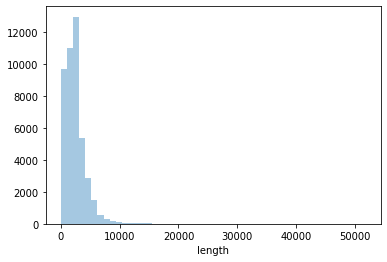

In [108]:
sns.distplot(news['length'],kde=False)

### Word Clouds

Ref: https://amueller.github.io/word_cloud/index.html

In [109]:
!pip install wordcloud

You should consider upgrading via the '/Users/cindy/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [110]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Select one example to demonstrate word cloud.

In [111]:
text = news['text'][1]
print(text)

WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition o

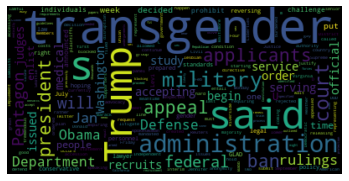

In [112]:
wordcloud = WordCloud().generate(text)

#Display word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Change some arguments for the word cloud and save to a file.

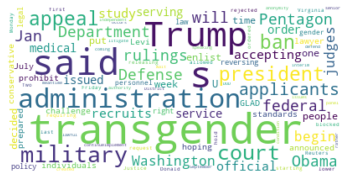

In [113]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
wordcloud.to_file("cloud.png")
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Remove Contractions

In [114]:
!pip install contractions
import contractions

You should consider upgrading via the '/Users/cindy/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [115]:
news['no_contract'] = news['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
news.head()

,label,title,text,subject,date,length,no_contract
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (Reuters), -, The, head, of, a, c..."
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (Reuters), -, Transgender, people..."
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (Reuters), -, The, special, couns..."
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (Reuters), -, Trump, campaign, ad..."
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (Reuters), -, President, ..."


In [116]:
news['text_str'] = [' '.join(map(str, l)) for l in news['no_contract']]
news.head()

,label,title,text,subject,date,length,no_contract,text_str
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (Reuters), -, The, head, of, a, c...",WASHINGTON (Reuters) - The head of a conservat...
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (Reuters), -, Transgender, people...",WASHINGTON (Reuters) - Transgender people will...
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (Reuters), -, The, special, couns...",WASHINGTON (Reuters) - The special counsel inv...
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...",WASHINGTON (Reuters) - Trump campaign adviser ...
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...",SEATTLE/WASHINGTON (Reuters) - President Donal...


### Tokenize

In [117]:
from nltk.tokenize import word_tokenize

In [118]:
news['tokenized'] =  news['text_str'].apply(word_tokenize)
news.head()

,label,title,text,subject,date,length,no_contract,text_str,tokenized
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (Reuters), -, The, head, of, a, c...",WASHINGTON (Reuters) - The head of a conservat...,"[WASHINGTON, (, Reuters, ), -, The, head, of, ..."
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (Reuters), -, Transgender, people...",WASHINGTON (Reuters) - Transgender people will...,"[WASHINGTON, (, Reuters, ), -, Transgender, pe..."
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (Reuters), -, The, special, couns...",WASHINGTON (Reuters) - The special counsel inv...,"[WASHINGTON, (, Reuters, ), -, The, special, c..."
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...",WASHINGTON (Reuters) - Trump campaign adviser ...,"[WASHINGTON, (, Reuters, ), -, Trump, campaign..."
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...",SEATTLE/WASHINGTON (Reuters) - President Donal...,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside..."


### Noise Cleaning - spacing, special characters, lowercasing

In [119]:
news['lower'] = news['tokenized'].apply(lambda x: [word.lower() for word in x])
news.head()

,label,title,text,subject,date,length,no_contract,text_str,tokenized,lower
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (Reuters), -, The, head, of, a, c...",WASHINGTON (Reuters) - The head of a conservat...,"[WASHINGTON, (, Reuters, ), -, The, head, of, ...","[washington, (, reuters, ), -, the, head, of, ..."
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (Reuters), -, Transgender, people...",WASHINGTON (Reuters) - Transgender people will...,"[WASHINGTON, (, Reuters, ), -, Transgender, pe...","[washington, (, reuters, ), -, transgender, pe..."
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (Reuters), -, The, special, couns...",WASHINGTON (Reuters) - The special counsel inv...,"[WASHINGTON, (, Reuters, ), -, The, special, c...","[washington, (, reuters, ), -, the, special, c..."
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...",WASHINGTON (Reuters) - Trump campaign adviser ...,"[WASHINGTON, (, Reuters, ), -, Trump, campaign...","[washington, (, reuters, ), -, trump, campaign..."
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...",SEATTLE/WASHINGTON (Reuters) - President Donal...,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...","[seattle/washington, (, reuters, ), -, preside..."


In [120]:
news['lower'] = news['tokenized'].apply(lambda x: [word.lower() for word in x])
news.head()

,label,title,text,subject,date,length,no_contract,text_str,tokenized,lower
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (Reuters), -, The, head, of, a, c...",WASHINGTON (Reuters) - The head of a conservat...,"[WASHINGTON, (, Reuters, ), -, The, head, of, ...","[washington, (, reuters, ), -, the, head, of, ..."
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (Reuters), -, Transgender, people...",WASHINGTON (Reuters) - Transgender people will...,"[WASHINGTON, (, Reuters, ), -, Transgender, pe...","[washington, (, reuters, ), -, transgender, pe..."
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (Reuters), -, The, special, couns...",WASHINGTON (Reuters) - The special counsel inv...,"[WASHINGTON, (, Reuters, ), -, The, special, c...","[washington, (, reuters, ), -, the, special, c..."
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...",WASHINGTON (Reuters) - Trump campaign adviser ...,"[WASHINGTON, (, Reuters, ), -, Trump, campaign...","[washington, (, reuters, ), -, trump, campaign..."
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...",SEATTLE/WASHINGTON (Reuters) - President Donal...,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...","[seattle/washington, (, reuters, ), -, preside..."


In [121]:
import string
punc = string.punctuation
news['no_punc'] = news['lower'].apply(lambda x: [word for word in x if word not in punc])
news.head()

,label,title,text,subject,date,length,no_contract,text_str,tokenized,lower,no_punc
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (Reuters), -, The, head, of, a, c...",WASHINGTON (Reuters) - The head of a conservat...,"[WASHINGTON, (, Reuters, ), -, The, head, of, ...","[washington, (, reuters, ), -, the, head, of, ...","[washington, reuters, the, head, of, a, conser..."
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (Reuters), -, Transgender, people...",WASHINGTON (Reuters) - Transgender people will...,"[WASHINGTON, (, Reuters, ), -, Transgender, pe...","[washington, (, reuters, ), -, transgender, pe...","[washington, reuters, transgender, people, wil..."
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (Reuters), -, The, special, couns...",WASHINGTON (Reuters) - The special counsel inv...,"[WASHINGTON, (, Reuters, ), -, The, special, c...","[washington, (, reuters, ), -, the, special, c...","[washington, reuters, the, special, counsel, i..."
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...",WASHINGTON (Reuters) - Trump campaign adviser ...,"[WASHINGTON, (, Reuters, ), -, Trump, campaign...","[washington, (, reuters, ), -, trump, campaign...","[washington, reuters, trump, campaign, adviser..."
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...",SEATTLE/WASHINGTON (Reuters) - President Donal...,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...","[seattle/washington, (, reuters, ), -, preside...","[seattle/washington, reuters, president, donal..."


### Remove stop words

In [122]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
news['no_stopwords'] = news['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
news.head()

,label,title,text,subject,date,length,no_contract,text_str,tokenized,lower,no_punc,no_stopwords
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (Reuters), -, The, head, of, a, c...",WASHINGTON (Reuters) - The head of a conservat...,"[WASHINGTON, (, Reuters, ), -, The, head, of, ...","[washington, (, reuters, ), -, the, head, of, ...","[washington, reuters, the, head, of, a, conser...","[washington, reuters, head, conservative, repu..."
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (Reuters), -, Transgender, people...",WASHINGTON (Reuters) - Transgender people will...,"[WASHINGTON, (, Reuters, ), -, Transgender, pe...","[washington, (, reuters, ), -, transgender, pe...","[washington, reuters, transgender, people, wil...","[washington, reuters, transgender, people, all..."
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (Reuters), -, The, special, couns...",WASHINGTON (Reuters) - The special counsel inv...,"[WASHINGTON, (, Reuters, ), -, The, special, c...","[washington, (, reuters, ), -, the, special, c...","[washington, reuters, the, special, counsel, i...","[washington, reuters, special, counsel, invest..."
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...",WASHINGTON (Reuters) - Trump campaign adviser ...,"[WASHINGTON, (, Reuters, ), -, Trump, campaign...","[washington, (, reuters, ), -, trump, campaign...","[washington, reuters, trump, campaign, adviser...","[washington, reuters, trump, campaign, adviser..."
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...",SEATTLE/WASHINGTON (Reuters) - President Donal...,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...","[seattle/washington, (, reuters, ), -, preside...","[seattle/washington, reuters, president, donal...","[seattle/washington, reuters, president, donal..."


In [123]:
news['stop_length'] = news['no_stopwords'].apply(len)
news.head()

,label,title,text,subject,date,length,no_contract,text_str,tokenized,lower,no_punc,no_stopwords,stop_length
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (Reuters), -, The, head, of, a, c...",WASHINGTON (Reuters) - The head of a conservat...,"[WASHINGTON, (, Reuters, ), -, The, head, of, ...","[washington, (, reuters, ), -, the, head, of, ...","[washington, reuters, the, head, of, a, conser...","[washington, reuters, head, conservative, repu...",482
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (Reuters), -, Transgender, people...",WASHINGTON (Reuters) - Transgender people will...,"[WASHINGTON, (, Reuters, ), -, Transgender, pe...","[washington, (, reuters, ), -, transgender, pe...","[washington, reuters, transgender, people, wil...","[washington, reuters, transgender, people, all...",403
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (Reuters), -, The, special, couns...",WASHINGTON (Reuters) - The special counsel inv...,"[WASHINGTON, (, Reuters, ), -, The, special, c...","[washington, (, reuters, ), -, the, special, c...","[washington, reuters, the, special, counsel, i...","[washington, reuters, special, counsel, invest...",280
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...",WASHINGTON (Reuters) - Trump campaign adviser ...,"[WASHINGTON, (, Reuters, ), -, Trump, campaign...","[washington, (, reuters, ), -, trump, campaign...","[washington, reuters, trump, campaign, adviser...","[washington, reuters, trump, campaign, adviser...",242
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...",SEATTLE/WASHINGTON (Reuters) - President Donal...,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...","[seattle/washington, (, reuters, ), -, preside...","[seattle/washington, reuters, president, donal...","[seattle/washington, reuters, president, donal...",528


### Lemmatize

In [124]:
from nltk.stem import WordNetLemmatizer

In [125]:
wnl = WordNetLemmatizer()
news['lemmatized'] = news['no_stopwords'].apply(lambda x: [wnl.lemmatize(word) for word in x])
news.head()

,label,title,text,subject,date,length,no_contract,text_str,tokenized,lower,no_punc,no_stopwords,stop_length,lemmatized
0,true,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",4659,"[WASHINGTON, (Reuters), -, The, head, of, a, c...",WASHINGTON (Reuters) - The head of a conservat...,"[WASHINGTON, (, Reuters, ), -, The, head, of, ...","[washington, (, reuters, ), -, the, head, of, ...","[washington, reuters, the, head, of, a, conser...","[washington, reuters, head, conservative, repu...",482,"[washington, reuters, head, conservative, repu..."
1,true,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",4077,"[WASHINGTON, (Reuters), -, Transgender, people...",WASHINGTON (Reuters) - Transgender people will...,"[WASHINGTON, (, Reuters, ), -, Transgender, pe...","[washington, (, reuters, ), -, transgender, pe...","[washington, reuters, transgender, people, wil...","[washington, reuters, transgender, people, all...",403,"[washington, reuters, transgender, people, all..."
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",2789,"[WASHINGTON, (Reuters), -, The, special, couns...",WASHINGTON (Reuters) - The special counsel inv...,"[WASHINGTON, (, Reuters, ), -, The, special, c...","[washington, (, reuters, ), -, the, special, c...","[washington, reuters, the, special, counsel, i...","[washington, reuters, special, counsel, invest...",280,"[washington, reuters, special, counsel, invest..."
3,true,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",2461,"[WASHINGTON, (Reuters), -, Trump, campaign, ad...",WASHINGTON (Reuters) - Trump campaign adviser ...,"[WASHINGTON, (, Reuters, ), -, Trump, campaign...","[washington, (, reuters, ), -, trump, campaign...","[washington, reuters, trump, campaign, adviser...","[washington, reuters, trump, campaign, adviser...",242,"[washington, reuters, trump, campaign, adviser..."
4,true,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",5204,"[SEATTLE/WASHINGTON, (Reuters), -, President, ...",SEATTLE/WASHINGTON (Reuters) - President Donal...,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...","[seattle/washington, (, reuters, ), -, preside...","[seattle/washington, reuters, president, donal...","[seattle/washington, reuters, president, donal...",528,"[seattle/washington, reuters, president, donal..."


### Revised word cloud

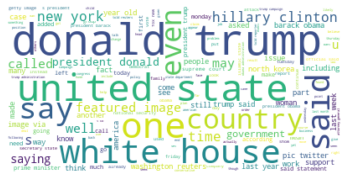

In [126]:
news["lemmatized_str"] = [' '.join(map(str, l)) for l in news['lemmatized']]
text = ' '.join(lemmat for lemmat in news.lemmatized_str)

wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Example 3 - NLTK Corpus

In [127]:
from nltk.corpus import inaugural

speeches = []
for fileid in inaugural.fileids():
    speeches.append((fileid, inaugural.raw(fileid)))

addresses = pd.DataFrame(speeches, columns=['filename','text'])

In [128]:
addresses.head()

,filename,text
0,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...
1,1793-Washington.txt,"Fellow citizens, I am again called upon by the..."
2,1797-Adams.txt,"When it was first perceived, in early times, t..."
3,1801-Jefferson.txt,Friends and Fellow Citizens:\n\nCalled upon to...
4,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica..."


In [129]:
from nltk.tokenize import word_tokenize

In [130]:
addresses['tokenized'] = addresses['text'].apply(word_tokenize)
addresses.head()

,filename,text,tokenized
0,1789-Washington.txt,Fellow-Citizens of the Senate and of the House...,"[Fellow-Citizens, of, the, Senate, and, of, th..."
1,1793-Washington.txt,"Fellow citizens, I am again called upon by the...","[Fellow, citizens, ,, I, am, again, called, up..."
2,1797-Adams.txt,"When it was first perceived, in early times, t...","[When, it, was, first, perceived, ,, in, early..."
3,1801-Jefferson.txt,Friends and Fellow Citizens:\n\nCalled upon to...,"[Friends, and, Fellow, Citizens, :, Called, up..."
4,1805-Jefferson.txt,"Proceeding, fellow citizens, to that qualifica...","[Proceeding, ,, fellow, citizens, ,, to, that,..."


In [131]:
addresses.sample(frac=0.05)

,filename,text,tokenized
32,1917-Wilson.txt,My Fellow citizens: The four years which have ...,"[My, Fellow, citizens, :, The, four, years, wh..."
55,2009-Obama.txt,My fellow citizens:\n\nI stand here today humb...,"[My, fellow, citizens, :, I, stand, here, toda..."
31,1913-Wilson.txt,There has been a change of government. It bega...,"[There, has, been, a, change, of, government, ..."
